In [1]:
from importlib import reload
import matplotlib.pyplot as plt

from ptycho import params as p
p.cfg['offset'] = 4
p.cfg['max_position_jitter'] = 10
p.cfg['nepochs'] = 60
p.cfg['output_prefix'] = 'tmp'
p.cfg['sim_jitter_scale'] = 0.
p.cfg['positions.provided'] = False

# p.cfg['probe.trainable'] = True
p.cfg['intensity_scale.trainable'] = True
p.cfg
from ptycho.initialize_run_pjitter import *

/home/ollie/anaconda3/envs/tf/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
2023-03-13 16:35:24.947505: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-13 16:35:25.045795: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-03-13 16:35:25.410346: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared o

simulating gaussian position jitter, scale 0.0
Using provided scan point offsets
Instructions for updating:
Please pass an integer value for `reinterpreted_batch_ndims`. The current behavior corresponds to `reinterpreted_batch_ndims=tf.size(distribution.batch_shape_tensor()) - 1`.


Instructions for updating:
Please pass an integer value for `reinterpreted_batch_ndims`. The current behavior corresponds to `reinterpreted_batch_ndims=tf.size(distribution.batch_shape_tensor()) - 1`.


simulating gaussian position jitter, scale 0.0
Using provided scan point offsets
1.0000024
nphoton 8.976987


In [274]:
imread('letters.png').shape, imread('squidward2.jpeg').shape

((225, 225, 4), (180, 320, 3))

In [529]:
from scipy.ndimage.filters import gaussian_filter as gf

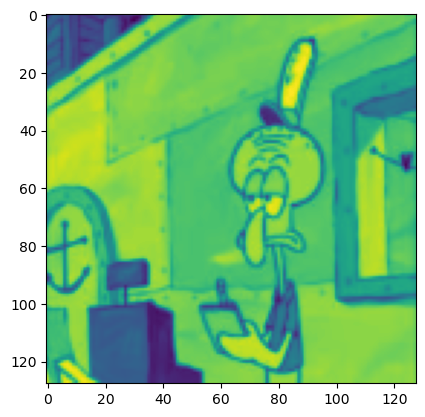

In [918]:
from matplotlib.pyplot import imread

sq = imread('squidward2.jpeg')

import matplotlib.pyplot as plt
import numpy as np

sq = sq.sum(axis = 2)[:, 40:-40]

from skimage.transform import rescale, resize

sq = resize(sq, (128, 128))

sq /= sq.max()

sq = gf(sq, .5)

plt.imshow(sq)

i = 40 - 7
i = 55 + (31 * 15)
i = 37 + (31 * 15)

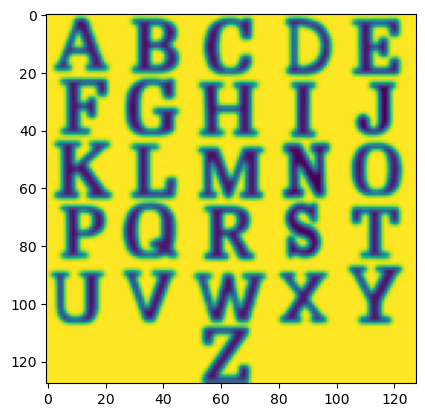

In [898]:
p.cfg['offset'] = 6
p.cfg['default_probe_scale'] = .5
reload(hh)
reload(probe)

from matplotlib.pyplot import imread

sq = 1 - imread('letters.png') + .5
sq = imread('letters.png') + .25

import matplotlib.pyplot as plt
import numpy as np

sq = sq.sum(axis = 2)

from skimage.transform import rescale, resize

sq = resize(sq, (128, 128))

sq = gf(sq, .75)

sq /= sq.max()

# sq = sq.T

plt.imshow(sq)

i = 0

In [919]:
I = sq[None, ..., None]

phi = np.pi * np.sin(.75 * np.pi * I)

from ptycho import physics

d = \
datasets.mk_simdata(None, None, probe.probe, YY_I = I, YY_phi = phi,
                   dict_fmt=True)

X = d['X']
Y_I = d['Y_I']
Y_phi = d['Y_phi']
intensity_scale = d['intensity_scale']
_Y_I_full = d['_Y_I_full']
norm_Y_I = d['norm_Y_I']
coords = d['coords']

I_pre = hh._flat_to_channel(d['I_pre_probe'])
phi_pre = hh._flat_to_channel(d['phi_pre_probe'])

Using provided scan point offsets


In [920]:
def show(arr2d, name = None, **kwargs):
    plt.imsave('images/' + name + '.png', arr2d, **kwargs)
    plt.imshow(arr2d, **kwargs)

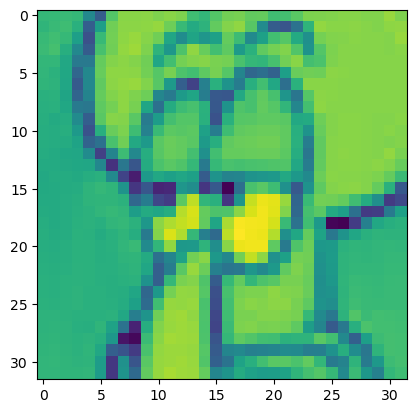

In [921]:
show(I_pre[:, 16:-16, 16:-16, :][i, :, :, 0], 'amp')

In [922]:
from ptycho import tf_helper as hh

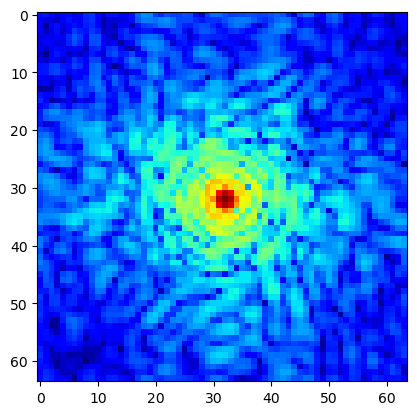

In [923]:
off = .01
show(np.log(off + X[i, :, :, 0]), 'in1', cmap = 'jet')
show(np.log(off + X[i, :, :, 1]), 'in2', cmap = 'jet')
show(np.log(off + X[i, :, :, 2]), 'in3', cmap = 'jet')
show(np.log(off + X[i, :, :, 3]), 'in4', cmap = 'jet')

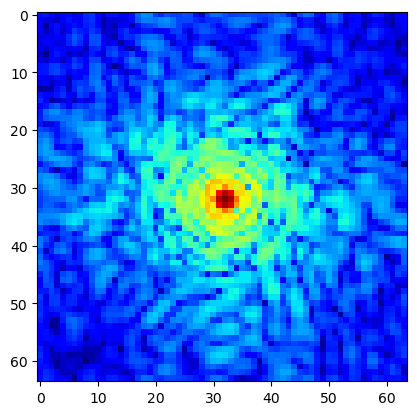

In [924]:
show(np.log(off + X[i, :, :, 0]), 'out1', cmap = 'jet')
show(np.log(off + X[i, :, :, 1]), 'out2', cmap = 'jet')
show(np.log(off + X[i, :, :, 2]), 'out3', cmap = 'jet')
show(np.log(off + X[i, :, :, 3]), 'out4', cmap = 'jet')

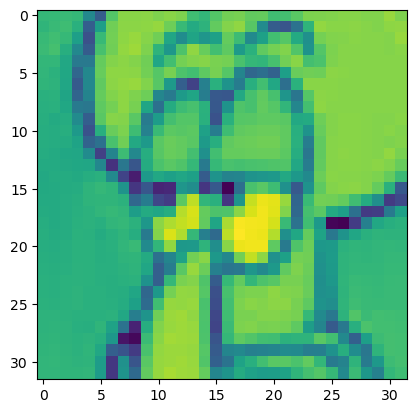

In [925]:
show(I_pre[:, 16:-16, 16:-16, :][i, :, :, 0], 'amp')

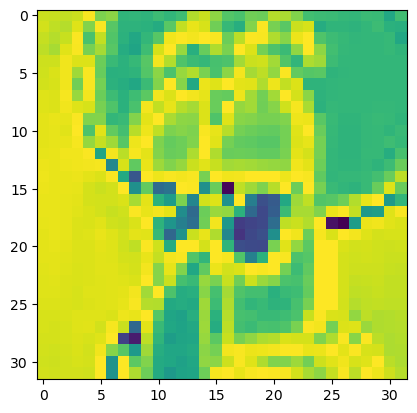

In [926]:
show(phi_pre[:, 16:-16, 16:-16, :][i, :, :, 0], 'phase')

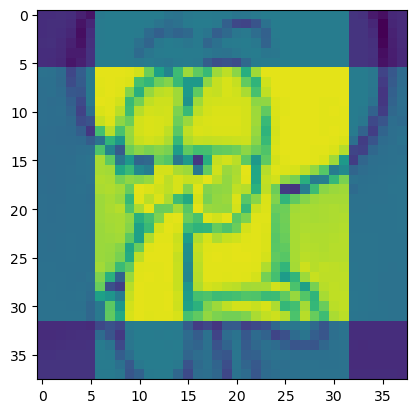

In [927]:
clipped_I_c = hh.pad_obj(I_pre[:, 16:-16, 16:-16, :], 64, 64)
clipped_phi_c = hh.pad_obj(phi_pre[:, 16:-16, 16:-16, :], 64, 64)


tmp = np.abs(np.real(np.exp(1j * np.array(clipped_phi_c)) * clipped_I_c))

clipped_I_reass = hh.reassemble_patches_real(tmp)
clipped_I_reass = np.array(clipped_I_reass)
vmax = clipped_I_reass.max()
clipped_I_reass[clipped_I_reass == 0] = vmax

show(clipped_I_reass[i, 16:-16, 16:-16, 0], 'full_obj', vmax = vmax)

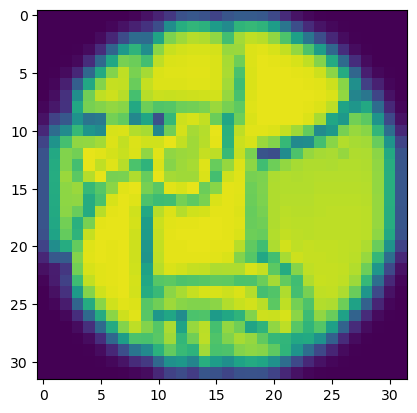

In [928]:
Y_real = np.abs(np.real(np.exp(1j * np.array(Y_phi)) * Y_I))

show(Y_real[i, 16:-16, 16:-16, 0], 'patch1', vmax = vmax)
show(Y_real[i, 16:-16, 16:-16, 1], 'patch2', vmax = vmax)
show(Y_real[i, 16:-16, 16:-16, 2], 'patch3', vmax = vmax)
show(Y_real[i, 16:-16, 16:-16, 3], 'patch4', vmax = vmax)